## Visualizations of decision functions for classification on 2-D synthetic data 

In [1]:
# useful imports

import utils as utl
import numpy as np

### We will use these sklearn functions to create virtual datasets

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

### Populating data into variables X features 2-D , y labels 1-D

In [3]:
#please uncomment only one of the following lines

#X, y = utl.create_dataset(method='make_classification')
#X, y = utl.create_dataset(method='make_blobs2')
X, y = utl.create_dataset(method='make_blobs3')
#X, y = utl.create_dataset(method='make_moons')
#X, y = utl.create_dataset(method='make_circles')

### Data is created as numpy arrays

In [4]:
X[-5:], y[-5:]

(array([[ 8.64910315,  3.14669222],
        [-4.20578655,  6.22744825],
        [10.02648388,  5.85046894],
        [11.49571759, -7.00626501],
        [12.94684216, -7.08891779]]),
 array([0, 2, 0, 1, 1]))

### Number of data points in each category

In [5]:
for label in range(np.unique(y).shape[0]):
    print("number of data points in category y={0} is : {1}".format(label, np.where(y==label)[0].shape[0]))   

number of data points in category y=0 is : 667
number of data points in category y=1 is : 667
number of data points in category y=2 is : 666


###  Initial plot of the full dataset

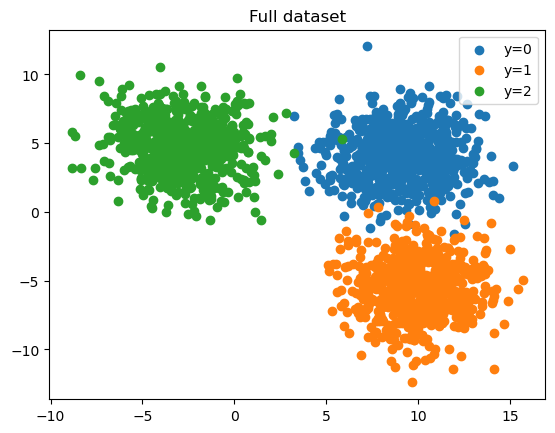

In [6]:
utl.plot_data(X, y)  

### Splitting the dataset into two subsets: Training set and Testing set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Separate plots for the two subsets
the split function perserved the underlying structure of Data

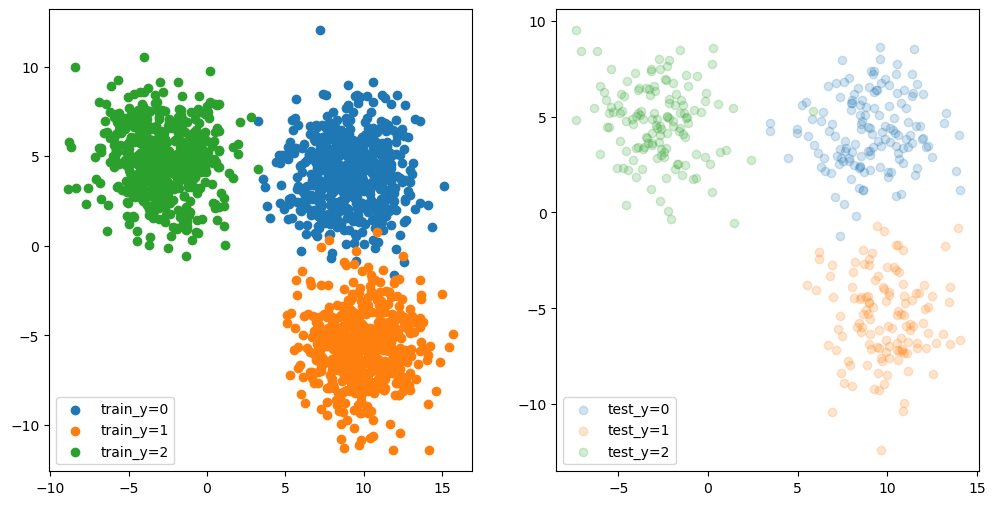

In [9]:
utl.plot_data(training_data=(X_train,y_train), testing_data=(X_test, y_test), training_testing = True)

### Let's instantiate the some classifiers

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [11]:

clf_dict = {'SGDClassifier': SGDClassifier(), 'MultiPerceptron': MLPClassifier(), 'SVC': SVC(), 'DecisionTree': DecisionTreeClassifier(), 'LogisticReg' : LogisticRegression(), 'RidgeClassifier': RidgeClassifier()}

### Training all the classifiers using training data

In [12]:
clf_dict_fitted={}
for key,  clf in clf_dict.items():
    clf.fit(X_train, y_train)
    clf_dict_fitted[key] = clf

In [13]:
clf_dict_fitted

{'SGDClassifier': SGDClassifier(),
 'MultiPerceptron': MLPClassifier(),
 'SVC': SVC(),
 'DecisionTree': DecisionTreeClassifier(),
 'LogisticReg': LogisticRegression(),
 'RidgeClassifier': RidgeClassifier()}

### Computing accuracy scores for each classifier on test data

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
acc_scores_dict = { key: accuracy_score(clf.predict(X_test), y_test) for (key, clf) in clf_dict_fitted.items()}

In [16]:
acc_scores_dict

{'SGDClassifier': 0.9725,
 'MultiPerceptron': 0.9875,
 'SVC': 0.995,
 'DecisionTree': 0.9875,
 'LogisticReg': 0.9925,
 'RidgeClassifier': 0.985}

`Note` : Here we didn't care about, cross-validation of tests scores or hyperparameter tuning because, here we only interested in visualizations of decision functions for a given classifier. 

### Decision function of each Classifier along with its accuracy score 

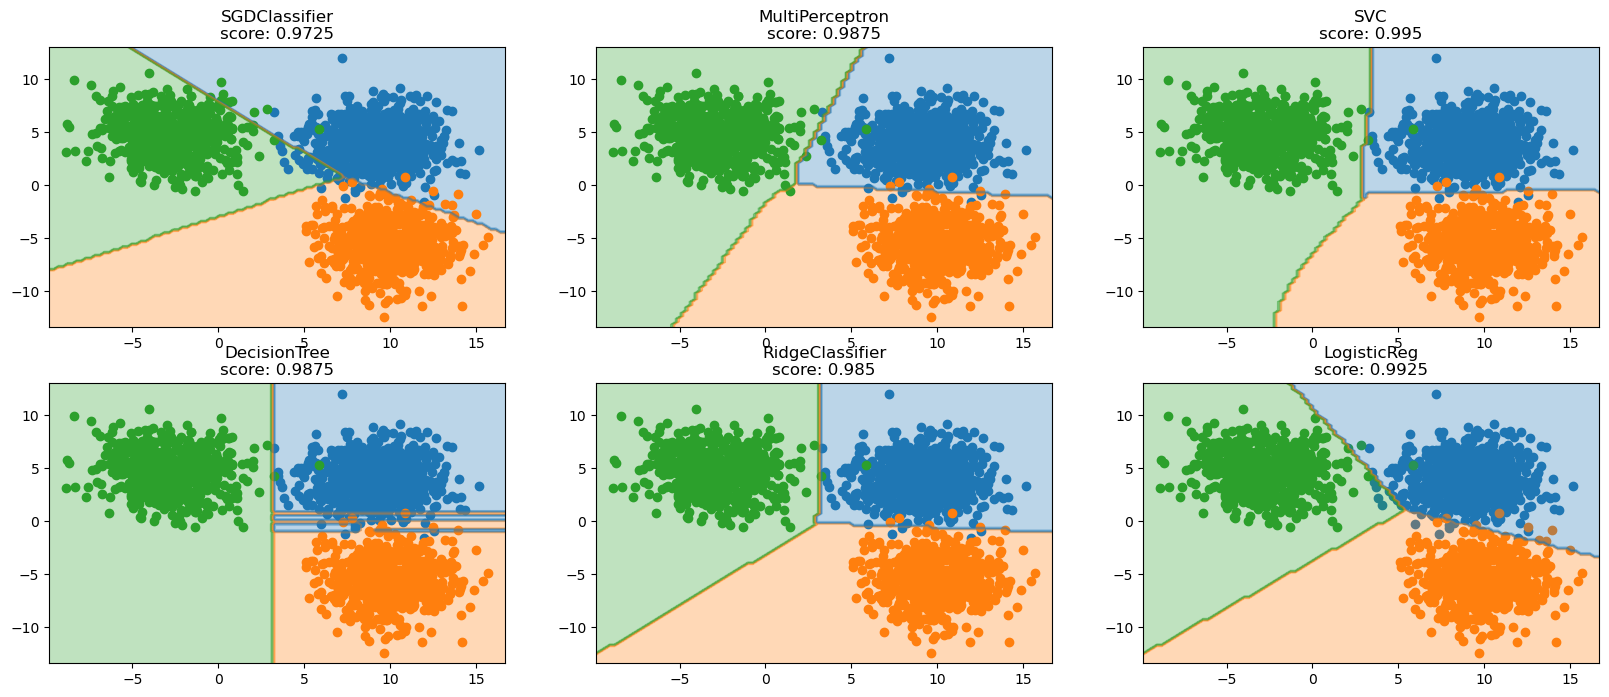

In [17]:
utl.classification_plot(clf_dict_fitted, X ,y, acc_scores_dict)

## @@thanks for reading... :)